# Exercise 7.1 
Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you character- ize the relationship between these variables?

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import nsfg
import random

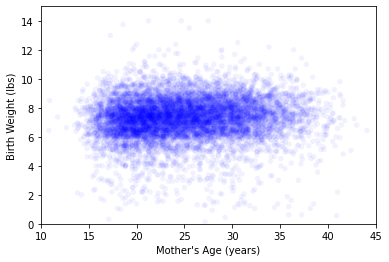

In [2]:
preg = nsfg.ReadFemPreg()
# Getting live births from pregnancy data frame.
live_births = preg[preg.outcome == 1]

# Getting mother's ages and birth weights.
mom_ages = live_births.agepreg
birth_weights = live_births.totalwgt_lb

# Scatter plot of birth weight vs mother’s age.
thinkplot.Scatter(mom_ages, birth_weights, alpha=0.05)
thinkplot.Config(xlabel="Mother's Age (years)",
                 ylabel='Birth Weight (lbs)',
                 xlim=[10, 45],
                 ylim=[0, 15],
                 legend=False)

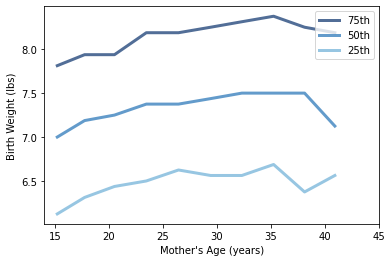

In [7]:
def Percentiles(df):
    """Function for calculating percentiles of Mother's Age vs Birth Weight."""
    
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Config(xlabel="Mother's Age (years)",
                     ylabel='Birth Weight (lbs)',
                     xlim=[14, 45], legend=True)

# Plotting percentiles of Birth Weight vs Mother’s Age.    
Percentiles(live_births)

In [22]:
def Cov(xs, ys, meanx=None, meany=None):
    """Function for calculating covaraince."""
    
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    """Function for calculating Pearsons's correlation."""
    
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    """Function for calculating Spearman's correlation."""
    
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

# Calculating Pearson’s and Spearman’s correlations.
print("Pearson's Correlation:", Corr(mom_ages, birth_weights))
print("Spearman's Correlation:", SpearmanCorr(mom_ages, birth_weights))

Pearson's Correlation: 0.06883397035410911
Spearman's Correlation: 0.09461004109658226


My Observations:

1. The scatterplot obviously reveals a weak link between the two variables, although it is difficult to see it.

2. Pearson's correlation coefficient is approximately 0.068, while Spearman's correlation coefficient is about 0.094. The discrepancy between them implies that outliers or a non-linear relationship are at work.

3. When we plot percentiles of weight against age, we can see that the connection non-linear. Between the ages of 15 and 25, the mother's birth weight grows more fast and it is gradual after 25 years mark.

# Exercise 8.1
In this chapter we used x ̄ and median to estimate μ, and found that x ̄ yields lower MSE. Also, we used S2 and Sn2−1 to estimate σ, and found that S2 is biased and Sn2−1 unbiased.
Run similar experiments to see if x ̄ and median are biased estimates of μ. Also check whether S2 or Sn2−1 yields a lower MSE.

In [25]:
def MeanError(estimates, actual):
    """function for calculating the mean error of a sequence of estimates."""
    
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def RMSE(estimates, actual):
    """function for calculating the root mean squared error of a sequence of estimates."""
    
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def Estimate4(n=7, iters=100000):
    """function for calculating the Mean error for xbar and median as estimators of population mean."""
    
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
def Estimate5(n=7, iters=100000):
    """function for RMSE for biased and unbiased estimators of population variance."""
    
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('\nExperiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate4()
Estimate5()

Experiment 1
mean error xbar 0.0001208509367697873
mean error median -0.0003773576262655973

Experiment 2
RMSE biased 0.5165424310866862
RMSE unbiased 0.5789368968350289


My observations: 

We can determine from the experiment that xbar and median generate decreased mean error as m increases. This means that both of them are not biased.

The biased estimator of variance generates a lower RMSE than the unbiased estimator, by roughly 10%,  Also we observed that the difference persists as the value of m grows larger.

# Exercise 8.2 
Suppose you draw a sample with size n = 10 from an exponen- tial distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.
Repeat the experiment with a few different values of n and make a plot of standard error versus n.

standard error 0.8178150346515927
confidence interval (1.2620474472686987, 3.703064531460324)


0.8178150346515927

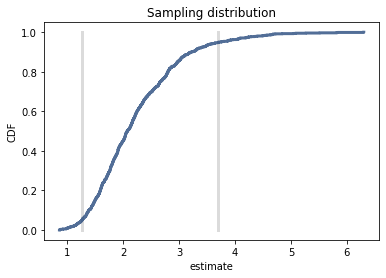

In [26]:
def SimulateSample(lam=2, n=10, iters=1000):
    """function for Sampling distribution of L as an estimator of exponential parameter."""
    
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plotting the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

My Observations:

With sample size 10:

standard error 0.8178150346515927
confidence interval (1.2620474472686987, 3.703064531460324)

As sample size increases, standard error and the width of the CI decrease:

10      0.90    (1.3, 3.9)
100     0.21    (1.7, 2.4)
1000    0.06    (1.9, 2.1)

All three confidence intervals contain the actual value, 2.